# __*LINEAR REGRESSION MODEL*__

## __*IMPORT LIBRARIES*__

In [220]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import r2_score,mean_absolute_error,root_mean_squared_error,mean_squared_error

import seaborn as sns


import matplotlib.pyplot as plt
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm
import statsmodels.formula.api as smf


## __*DATASET*__

In [221]:
data = pd.read_csv('cleaned_data.csv')
data = data.dropna(subset=['marathon_time_in_minutes']) # NOTE: dropping NaN in marathon times 
y_marathon = data[['weight', 'days', 'weeklyKM', 'vo2max' ]] 
X_marathon = data[['marathon_time_in_minutes', 'height', 'age', 'yearsTrained',]]

## __*HEATMAP*__

Text(0.5, 1.0, 'Correlation Between Variables')

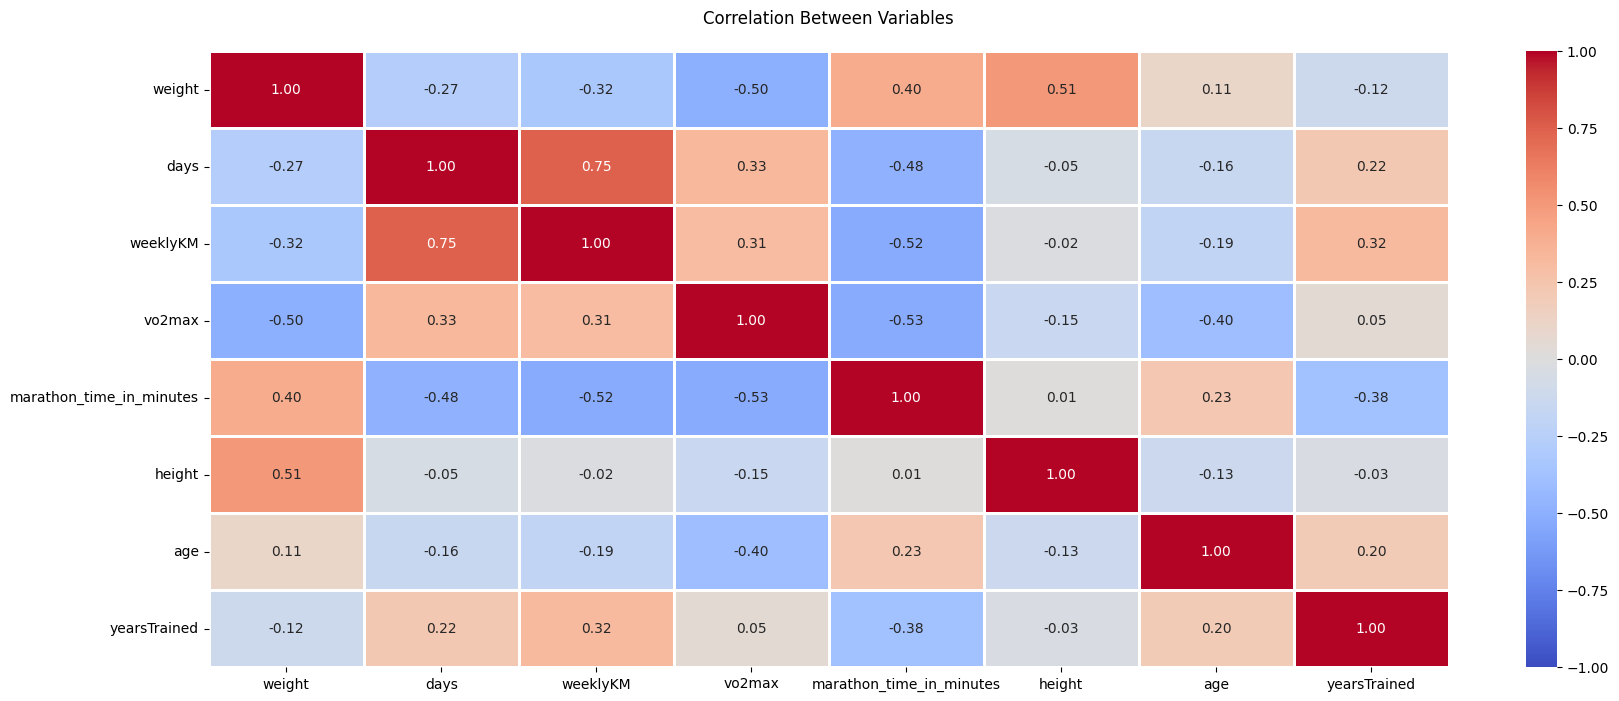

In [ ]:
bb = data[['weight', 'days', 'weeklyKM', 'vo2max','marathon_time_in_minutes', 'height', 'age', 'yearsTrained' ]] 
corr = bb.corr()
plt.figure(figsize=(20, 8))  

sns.heatmap(corr, vmin=-1, vmax=1, cmap = 'coolwarm', annot=True, fmt='.2f', linewidths=1)
plt.title("Correlation Between Variables", pad=20)

REMEMBER !!!!  we investigate both negative and posiive influence

## __*TRAIN AND PERFORM MULTIOUPUT LINEAR REGRESSION*__ 

__scickit.lern implementation__

In [ ]:
def perform_linear_regresson(x,y):

    X_train,X_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=42)
    ln = MultiOutputRegressor(LinearRegression())
    ln = ln.fit(X_train, y_train)
    pred = ln.predict(X_test)

    score = ln.score(X_train, y_train)
    mse = mean_squared_error(y_test,pred)
    r2 = r2_score(y_test,pred)
    coeff = [estimator.coef_ for estimator in ln.estimators_]


    return ln,mse,r2,y_test,pred,score,coeff

In [223]:
ln,mse,r2,y_test,pred,score,coeff = perform_linear_regresson(X_marathon,y_marathon)

print(f'mse is : {mse}')
print(f'r2 is : {r2}')
print(f'score is : {score}')

mse is : 142.79316369909412
r2 is : 0.29402136832535763
score is : 0.3447408067923838


## __OLS LINEAR REGRESSION INVESTIGATION__

### __PREDICT each multioutput realization separately and store them__

In [224]:
data_ols = data[['marathon_time_in_minutes', 'height', 'age', 'yearsTrained', 'weight', 'days', 'weeklyKM', 'vo2max']]

train, test = train_test_split(data_ols, test_size=0.2, random_state=42)

models = []
for i,col in enumerate(y_marathon):
    model = smf.ols(f"{col} ~ marathon_time_in_minutes + height + age + yearsTrained ", data=train).fit()
    models.append(model)

### 
__INTRODUCTION FOR THE ANALYSIS__

The P-value is used to conclude if there is any relationship between the predictor and the realization :

-  A low value P < 0.05 means that coefficint beta associated to that varible is not equal to zero hence the varible is influencing the outcome
- A high P > 0.05 means that we caanot confidently say that this variable is affecting the outcome

The thresold 0.05 is associated to the rejection of the null hypothesis where we state that the null hypoesis is __Wrongly__ rejected 5% of the time 

If the P value is for example a high percentage, we coclude that with that percentage the coefficient couldbe 0, hence not influencing 

#### __INVESTIGATE Y REALIZATIONS SINGULARLY. (real Y as realization)__                                       

##### __WEIGHT -- as realization__

In [225]:
print(f'model summary for value {models[0].model.endog_names} \n \n {models[0].summary()}')

model summary for value weight 
 
                             OLS Regression Results                            
Dep. Variable:                 weight   R-squared:                       0.409
Model:                            OLS   Adj. R-squared:                  0.386
Method:                 Least Squares   F-statistic:                     17.33
Date:                Thu, 10 Apr 2025   Prob (F-statistic):           7.88e-11
Time:                        11:10:56   Log-Likelihood:                -352.87
No. Observations:                 105   AIC:                             715.7
Df Residuals:                     100   BIC:                             729.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------

In [226]:
p = models[0].predict(test)
print("Test weight R² (generalization):", r2_score(test["weight"], p))

Test weight R² (generalization): 0.40272192587516153


Height given the p value is strongly effecting the weight, this is expected because normally higher people tend to weight more given the fact that they have way more mass.

Age and Years Trained have a high percentage of having a 0 valued coefficient resulting in a null influence on weight.  

R2 on unseen data is very high which means we we are able to predict veery well weight!!!

##### __DAYS -- as realization__

In [227]:
print(f'model summary for value {models[1].model.endog_names} \n \n {models[1].summary()}')

model summary for value days 
 
                             OLS Regression Results                            
Dep. Variable:                   days   R-squared:                       0.266
Model:                            OLS   Adj. R-squared:                  0.237
Method:                 Least Squares   F-statistic:                     9.057
Date:                Thu, 10 Apr 2025   Prob (F-statistic):           2.77e-06
Time:                        11:10:57   Log-Likelihood:                -157.92
No. Observations:                 105   AIC:                             325.8
Df Residuals:                     100   BIC:                             339.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------

In [228]:
pp = models[1].predict(test)
print("Test days R² (generalization):", r2_score(test["marathon_time_in_minutes"], pp))

Test days R² (generalization): -32.03029056394022


Days looks very bad, in the sense that neither of the predictors seem to be able to predict the days of training. This is somehow expected given that sometimes most people train based on their daily needs, working time and tireness. Maybe someone has more time on certain days so runs more in a single day compared to spreading it in multiple days.

This needs o be taken into account.

R2 on unseen data is negative which is not good at all

##### __WEEKLYKM -- as realization__

In [229]:
print(f'model summary for value {models[2].model.endog_names} \n \n {models[2].summary()}')

model summary for value weeklyKM 
 
                             OLS Regression Results                            
Dep. Variable:               weeklyKM   R-squared:                       0.357
Model:                            OLS   Adj. R-squared:                  0.331
Method:                 Least Squares   F-statistic:                     13.86
Date:                Thu, 10 Apr 2025   Prob (F-statistic):           4.97e-09
Time:                        11:10:57   Log-Likelihood:                -439.35
No. Observations:                 105   AIC:                             888.7
Df Residuals:                     100   BIC:                             902.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------

In [230]:
ppp = models[2].predict(test)
print("Test weeklyKM R² (generalization):", r2_score(test["marathon_time_in_minutes"], ppp))

Test weeklyKM R² (generalization): -20.698031889072794


In this case yearsTrained has a low P-value but not lower than 0.05 which means that we would have a higher chance of wrongly rejecting the null hypothesis, though compared to height and age, it seems resonable that someone that has been training for longer time then could run more km weekly

R2 on unseen data is negative which is not good at all.

##### __VO2MAX -- as realization__

In [231]:
print(f'model summary for value {models[3].model.endog_names} \n \n {models[3].summary()}')

model summary for value vo2max 
 
                             OLS Regression Results                            
Dep. Variable:                 vo2max   R-squared:                       0.418
Model:                            OLS   Adj. R-squared:                  0.395
Method:                 Least Squares   F-statistic:                     17.98
Date:                Thu, 10 Apr 2025   Prob (F-statistic):           3.77e-11
Time:                        11:10:57   Log-Likelihood:                -337.78
No. Observations:                 105   AIC:                             685.6
Df Residuals:                     100   BIC:                             698.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------

In [232]:
pppp = models[3].predict(test)
print("Test vo2max R² (generalization):", r2_score(test["marathon_time_in_minutes"], pppp))

Test vo2max R² (generalization): -21.57287850859753


As already discussed in EDA, as age increases, vo2max is lower and linear regression is fully able to get that and recognises that age has a very high impact on vo2max. Given this it makes sense to have age as a predictor in order to be able to influence the vo2max prediction. 

- Moreover is to investigate the effect that vo2max has on marathon time. 

R2 is negative on unseen data which means it is not very good!!

#### __INVESTIGATE EFFECT OF Y REALIZATIONS AS PREDICOTORS FOR MARATHON TIME. (real Y as predictor)__ 

##### __All predictors against marathon_time__

In [233]:
model_all = smf.ols(f" marathon_time_in_minutes ~ weight + days + weeklyKM + vo2max ", data=train).fit()
print(model_all.summary())

                               OLS Regression Results                               
Dep. Variable:     marathon_time_in_minutes   R-squared:                       0.458
Model:                                  OLS   Adj. R-squared:                  0.436
Method:                       Least Squares   F-statistic:                     21.09
Date:                      Thu, 10 Apr 2025   Prob (F-statistic):           1.25e-12
Time:                              11:10:57   Log-Likelihood:                -517.48
No. Observations:                       105   AIC:                             1045.
Df Residuals:                           100   BIC:                             1058.
Df Model:                                 4                                         
Covariance Type:                  nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------

In [234]:
pred__all = model_all.predict(test)
print("Test all R² (generalization):", r2_score(test["marathon_time_in_minutes"], pred__all))

Test all R² (generalization): 0.3069511005299368


##### __using only weeklykm and vo2max__

In [235]:
model_two = smf.ols(f" marathon_time_in_minutes ~ weeklyKM + vo2max ", data=train).fit()
print(model_two.summary())

                               OLS Regression Results                               
Dep. Variable:     marathon_time_in_minutes   R-squared:                       0.453
Model:                                  OLS   Adj. R-squared:                  0.442
Method:                       Least Squares   F-statistic:                     42.23
Date:                      Thu, 10 Apr 2025   Prob (F-statistic):           4.36e-14
Time:                              11:10:57   Log-Likelihood:                -517.92
No. Observations:                       105   AIC:                             1042.
Df Residuals:                           102   BIC:                             1050.
Df Model:                                 2                                         
Covariance Type:                  nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------

In [236]:
pred_two = model_two.predict(test)
print("Test weekly and weight R² (generalization):", r2_score(test["marathon_time_in_minutes"], pred_two))

Test weekly and weight R² (generalization): 0.26163059391616394


##### __Weight against marathon time__

In [237]:
model_weight = smf.ols(f" marathon_time_in_minutes ~ weight ", data=train).fit()
print(model_weight.summary())

                               OLS Regression Results                               
Dep. Variable:     marathon_time_in_minutes   R-squared:                       0.139
Model:                                  OLS   Adj. R-squared:                  0.131
Method:                       Least Squares   F-statistic:                     16.68
Date:                      Thu, 10 Apr 2025   Prob (F-statistic):           8.75e-05
Time:                              11:10:57   Log-Likelihood:                -541.70
No. Observations:                       105   AIC:                             1087.
Df Residuals:                           103   BIC:                             1093.
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------

In [238]:
pred_weight = model_weight.predict(test)
print("Test days R² (generalization):", r2_score(test["marathon_time_in_minutes"], pred_weight))

Test days R² (generalization): 0.24745862775547667


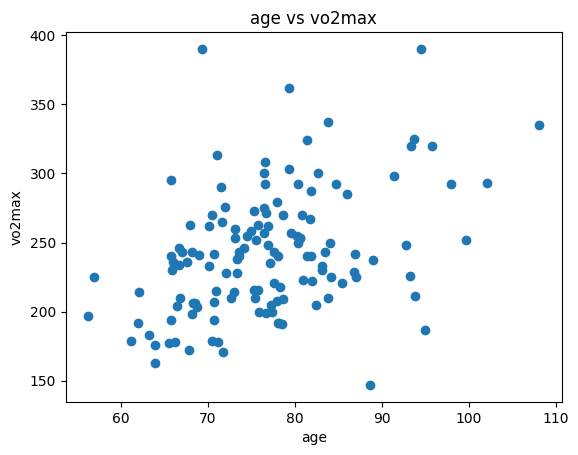

In [250]:
plt.scatter(data['weight'], data['marathon_time_in_minutes'])
plt.title('age vs vo2max')
plt.xlabel('age')
plt.ylabel('vo2max')
plt.show()

##### __days against marathon time__

In [239]:
model_days = smf.ols(f" marathon_time_in_minutes ~ days ", data=train).fit()
print(model_days.summary())

                               OLS Regression Results                               
Dep. Variable:     marathon_time_in_minutes   R-squared:                       0.253
Model:                                  OLS   Adj. R-squared:                  0.246
Method:                       Least Squares   F-statistic:                     34.90
Date:                      Thu, 10 Apr 2025   Prob (F-statistic):           4.51e-08
Time:                              11:10:57   Log-Likelihood:                -534.27
No. Observations:                       105   AIC:                             1073.
Df Residuals:                           103   BIC:                             1078.
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------

In [240]:
pred_days = model_days.predict(test)
print("Test days R² (generalization):", r2_score(test["marathon_time_in_minutes"], pred_days))

Test days R² (generalization): 0.1477460457656996


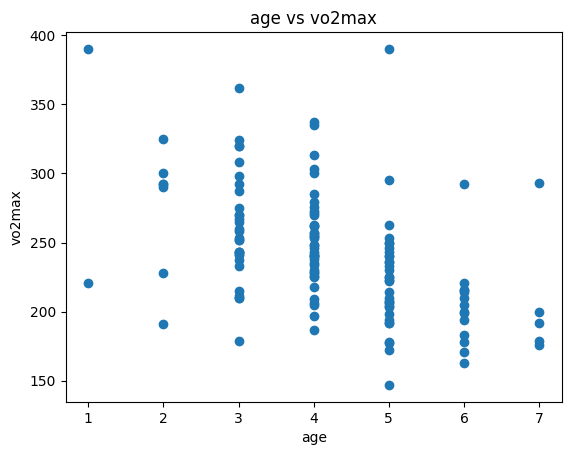

In [251]:
plt.scatter(data['days'], data['marathon_time_in_minutes'])
plt.title('age vs vo2max')
plt.xlabel('age')
plt.ylabel('vo2max')
plt.show()

##### __weeklyKM against marathon time__

In [241]:
model_weekly = smf.ols(f" marathon_time_in_minutes ~ weeklyKM ", data=data_ols).fit()
print(model_weekly.summary())

                               OLS Regression Results                               
Dep. Variable:     marathon_time_in_minutes   R-squared:                       0.275
Model:                                  OLS   Adj. R-squared:                  0.269
Method:                       Least Squares   F-statistic:                     49.21
Date:                      Thu, 10 Apr 2025   Prob (F-statistic):           1.14e-10
Time:                              11:10:57   Log-Likelihood:                -667.91
No. Observations:                       132   AIC:                             1340.
Df Residuals:                           130   BIC:                             1346.
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------

In [242]:
pred_weekly= model_weekly.predict(test)
print("Test weeklyKM R² (generalization):", r2_score(test["marathon_time_in_minutes"], pred_weekly))

Test weeklyKM R² (generalization): 0.10374678328805709


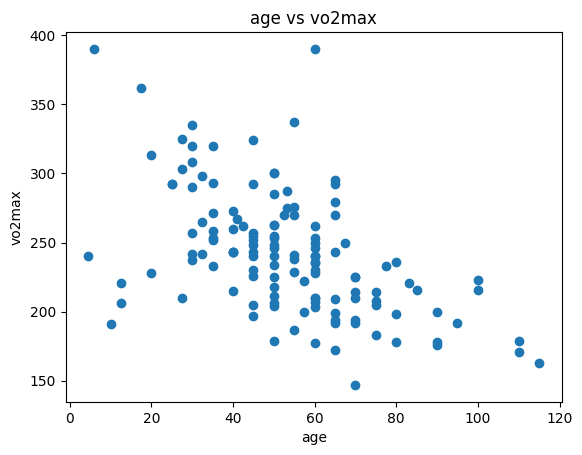

In [253]:
plt.scatter(data['weeklyKM'], data['marathon_time_in_minutes'])
plt.title('age vs vo2max')
plt.xlabel('age')
plt.ylabel('vo2max')
plt.show()

##### __vo2max against marathon time__

In [243]:
model_vo2max = smf.ols(f" marathon_time_in_minutes ~ vo2max ", data=train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 vo2max   R-squared:                       0.418
Model:                            OLS   Adj. R-squared:                  0.395
Method:                 Least Squares   F-statistic:                     17.98
Date:                Thu, 10 Apr 2025   Prob (F-statistic):           3.77e-11
Time:                        11:10:57   Log-Likelihood:                -337.78
No. Observations:                 105   AIC:                             685.6
Df Residuals:                     100   BIC:                             698.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [244]:
pred_vo2max = model_vo2max.predict(test)
print("Test vo2max R² (generalization):", r2_score(test["marathon_time_in_minutes"], pred_vo2max))

Test vo2max R² (generalization): 0.33042357211909046


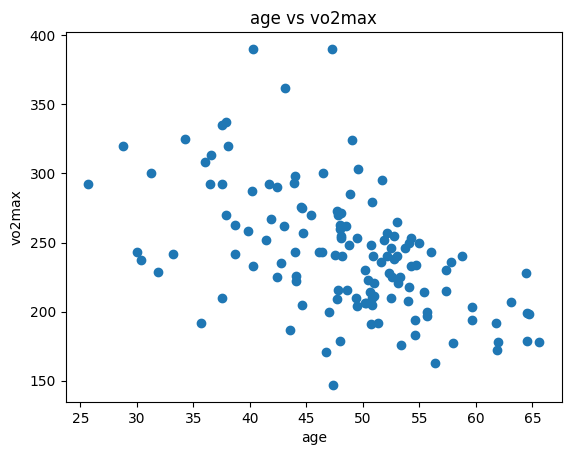

In [254]:
plt.scatter(data['vo2max'], data['marathon_time_in_minutes'])
plt.title('age vs vo2max')
plt.xlabel('age')
plt.ylabel('vo2max')
plt.show()

##### __DEMONSTRATION THAT NOT ALL P-VALUES ARE 0 -- bestSar (best sit and reach)__

In [245]:
data_with_sar = data[['marathon_time_in_minutes', 'height', 'age', 'yearsTrained', 'weight', 'days', 'weeklyKM', 'vo2max', 'bestSar']]

train_with_sar, test_wit_sar = train_test_split(data_with_sar, test_size=0.2, random_state=42)

model = smf.ols(f" marathon_time_in_minutes ~ bestSar ", data=train_with_sar).fit()
print(model.summary())

                               OLS Regression Results                               
Dep. Variable:     marathon_time_in_minutes   R-squared:                       0.001
Model:                                  OLS   Adj. R-squared:                 -0.008
Method:                       Least Squares   F-statistic:                    0.1383
Date:                      Thu, 10 Apr 2025   Prob (F-statistic):              0.711
Time:                              11:10:57   Log-Likelihood:                -549.52
No. Observations:                       105   AIC:                             1103.
Df Residuals:                           103   BIC:                             1108.
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------

###

__ANALYSIS OUTCOME__

Single Predictors all have a P-value = 0.00 which means that they all strongly influence marathon time. 

Our model in facts aims at suggesting runners the best way to reach their desired marathon time, given weight, days, weeklyKM and vo2max as strong influencing predictors of marthon time, retrieving exactly this values from the multioutput tree analysis is the right way of solving the problem.

Every singular predictor is able to explain in between 25% - 30% of overall marathon time variance which for the amount of data that we have is not too bad. All p-values singularly have value = 0.00 which means strong influence.

When the predictors are combined together in predicting marathon time, the overall explained variance is around 40%- 45% which again not bad for the little amount of data that we have. P-values of weight and days are a bit high, around 0.2 which means that when combined with the others they are not as influencing as they are alone in predicting marathon time, still the singular prediction test (using only them singularly to predict the marathon time) tells us they they effectively influence the marathon time. Though evaluating a linear regression simply with weeklyKM and vo2max reaches the same variance explanation which mens we could lower the Y space to just weeklyKM and vo2max.

*TO CONCLUDE*

This analysis tells us that predicting the following parameters is effectively the right way of suggesting a runner the best metrics to improve on in order to reach his desired time. 

Though we need to take into account the fact that this variables (Y predictors) are the ones we are __predicting__ in multioutput trees, hence this metrics are just showing that we are predicting the right indicators for marthon time.

The analysis exemplifies also that when predicting this variables, given the low amount of data we have an r2 squared that is low.